In [1]:
import h5py
import pylab as pl 
import numpy as np

%matplotlib inline

# Optimized plot parameters to make beautiful plots:
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['figure.dpi']      = 300
pl.rcParams['image.cmap']      = 'jet'
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in' 

In [100]:
# Importing density evolution as given by the CK code:
h5f         = h5py.File('dump.h5', 'r')
density     = h5f['density'][:]
vel_drift_x = h5f['vel_drift_x'][:]
vel_drift_y = h5f['vel_drift_y'][:]
T_ee        = h5f['T_ee'][:]
x_center = h5f['x_center'][:]
y_center = h5f['y_center'][:]
time     = h5f['time'][:]
h5f.close()

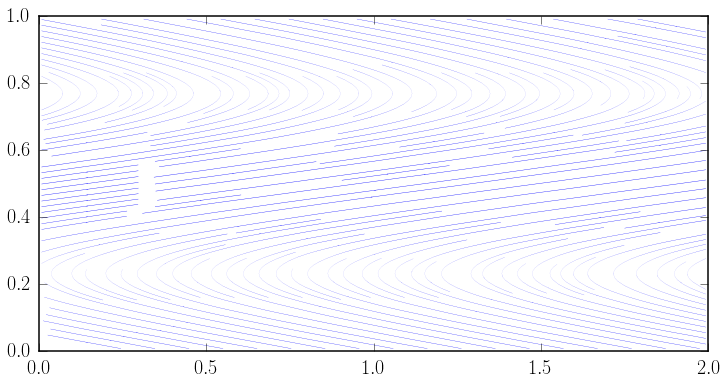

In [101]:
time_step = -1
#pl.contourf(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], T_ee[time_step, 3:-3, 3:-3]\
#           , 100, cmap='gist_heat')
#pl.colorbar()

vel_mag = (vel_drift_x[:, 3:-3, 3:-3]**2. + vel_drift_y[:, 3:-3, 3:-3]**2.)**0.5

pl.streamplot(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], \
              vel_drift_x[time_step, 3:-3, 3:-3], vel_drift_y[time_step, 3:-3, 3:-3], \
              density=2, color='blue', linewidth=vel_mag[time_step]/vel_mag.max(), arrowsize=0.01)

pl.axes().set_aspect('equal')

#pl.clf()
#step = 1
#for time_step in range(0, time.size, step):
#    print("time_step = ", time_step)
    
#    pl.streamplot(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], \
#              vel_drift_x[time_step, 3:-3, 3:-3], vel_drift_y[time_step, 3:-3, 3:-3], \
#              density=4, color='blue', linewidth=10*vel_mag[time_step]/vel_mag.max(), arrowsize=0.01)

#    pl.axes().set_aspect('equal')
    #pl.title(r'$\mathrm{Time}\;=\;' + str(0.01*time_step) + '$')
#    pl.title(r'Time = ' + str(0.01*time_step))
#    pl.savefig('device_sim_' + '%04d'%(time_step/step) + '.png')
#    pl.clf()

In [57]:
density.shape

(3, 70, 134)

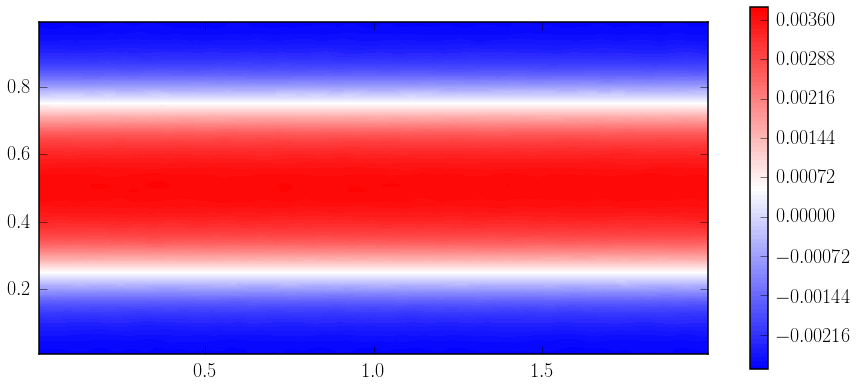

In [103]:
vel_mag = (vel_drift_x[:, 3:-3, 3:-3]**2. + vel_drift_y[:, 3:-3, 3:-3]**2.)**0.5

min_val = np.min(vel_mag[:, :, :])
max_val = np.max(vel_mag[:, :, :])
colorlevels = np.linspace(min_val, max_val, 100)

time_step = -1
pl.figure(figsize=(15, 6.5))
pl.contourf(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], vel_drift_x[time_step, 3:-3, 3:-3], 100, cmap='bwr')
pl.axes().set_aspect('equal')
pl.colorbar()

#for time_step in range(1, time.size):
#    print("time_step = ", time_step)

#    pl.contourf(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], vel_mag[time_step], colorlevels, cmap='gist_heat')
#    pl.axes().set_aspect('equal')
#    pl.title(r'Time = ' + str(0.01*time_step) )
#    pl.colorbar()
#    pl.savefig('device_sim_' + '%04d'%time_step + '.png')
#    pl.clf()

In [3]:
import gc
from mpl_toolkits.mplot3d import Axes3D

min_density = np.min(density[:, :, :] - np.mean(density[0, :, :]))
max_density = np.max(density[:, :, :] - np.mean(density[0, :, :]))

#fig = pl.figure(figsize=pl.figaspect(.5)*1.5)
#ax = fig.add_subplot(111, projection='3d')

#time_step = 1
#ax.plot_wireframe(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], \
#                  density[time_step, 3:-3, 3:-3] - np.mean(density[0, 3:-3, 3:-3]), alpha=0.1)
#ax.set_zlim3d(min_density, max_density)

for time_step in range(478, time.size):
    print("time_step = ", time_step)
    
    fig = pl.figure(figsize=pl.figaspect(.5)*1.5)
    ax = fig.add_subplot(111, projection='3d')

    fig.suptitle(r'Density at time = ' + str(0.005*time_step) )

    ax.plot_wireframe(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], \
                  density[time_step, 3:-3, 3:-3] - np.mean(density[0, 3:-3, 3:-3]), alpha=0.1)
    ax.set_zlim3d(min_density, max_density)

    pl.savefig('density_ee_' + '%04d'%time_step + '.png')
    pl.close(fig)
    gc.collect()

('time_step = ', 478)
('time_step = ', 479)
('time_step = ', 480)
('time_step = ', 481)
('time_step = ', 482)
('time_step = ', 483)
('time_step = ', 484)
('time_step = ', 485)
('time_step = ', 486)
('time_step = ', 487)
('time_step = ', 488)
('time_step = ', 489)
('time_step = ', 490)
('time_step = ', 491)
('time_step = ', 492)
('time_step = ', 493)
('time_step = ', 494)
('time_step = ', 495)
('time_step = ', 496)
('time_step = ', 497)
('time_step = ', 498)
('time_step = ', 499)
('time_step = ', 500)
('time_step = ', 501)
('time_step = ', 502)
('time_step = ', 503)
('time_step = ', 504)
('time_step = ', 505)
('time_step = ', 506)
('time_step = ', 507)
('time_step = ', 508)
('time_step = ', 509)
('time_step = ', 510)
('time_step = ', 511)
('time_step = ', 512)
('time_step = ', 513)
('time_step = ', 514)
('time_step = ', 515)
('time_step = ', 516)
('time_step = ', 517)
('time_step = ', 518)
('time_step = ', 519)
('time_step = ', 520)
('time_step = ', 521)
('time_step = ', 522)
('time_ste

In [7]:
from mpl_toolkits.mplot3d import Axes3D

min_density = np.min(density[:, :, :] - np.mean(density[0, :, :]))
max_density = np.max(density[:, :, :] - np.mean(density[0, :, :]))


for time_step in range(137, time.size):
    print("time_step = ", time_step)
    
    fig = pl.figure(figsize=pl.figaspect(.5)*1.5)
    ax = fig.add_subplot(121, projection='3d')
    
    fig.suptitle(r'Density at time = ' + str(0.005*time_step) )
    ax.text(-1.5, 2.5, 0, 'Defect scattering')
    ax.plot_wireframe(x_center[:, :, 0], y_center[:, :, 0], \
                      density_defect[time_step, :, :] - np.mean(density_defect[time_step, :, :]), alpha=0.1)
    ax.set_zlim3d(min_density, max_density)

    ax = fig.add_subplot(122, projection='3d')
    ax.text(-1.5, 2.5, 0, 'electron-electron scattering')
    ax.plot_wireframe(x_center[:, :, 0], y_center[:, :, 0], \
                      density[time_step, :, :] - np.mean(density[time_step, :, :]), alpha=0.1)
        
    ax.set_zlim3d(min_density, max_density)

    pl.savefig('density_' + '%04d'%time_step + '.png')
    pl.clf()
    pl.close(fig)
    

('time_step = ', 137)
('time_step = ', 138)
('time_step = ', 139)
('time_step = ', 140)
('time_step = ', 141)
('time_step = ', 142)
('time_step = ', 143)
('time_step = ', 144)
('time_step = ', 145)
('time_step = ', 146)
('time_step = ', 147)
('time_step = ', 148)
('time_step = ', 149)
('time_step = ', 150)
('time_step = ', 151)
('time_step = ', 152)
('time_step = ', 153)
('time_step = ', 154)
('time_step = ', 155)
('time_step = ', 156)
('time_step = ', 157)
('time_step = ', 158)
('time_step = ', 159)
('time_step = ', 160)
('time_step = ', 161)
('time_step = ', 162)
('time_step = ', 163)
('time_step = ', 164)
('time_step = ', 165)
('time_step = ', 166)
('time_step = ', 167)
('time_step = ', 168)
('time_step = ', 169)
('time_step = ', 170)
('time_step = ', 171)
('time_step = ', 172)
('time_step = ', 173)
('time_step = ', 174)
('time_step = ', 175)
('time_step = ', 176)
('time_step = ', 177)
('time_step = ', 178)
('time_step = ', 179)
('time_step = ', 180)
('time_step = ', 181)
('time_ste

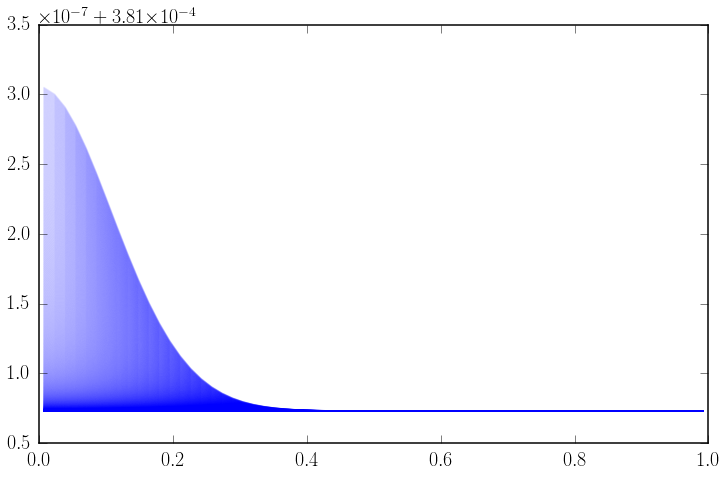

In [161]:
for t in range(time.size):
    pl.plot(x_center[16, 3:-3, 0], density[t, 3:-3, 16] - 0.*np.mean(density[-1, :, :]), color='blue', alpha=0.1)

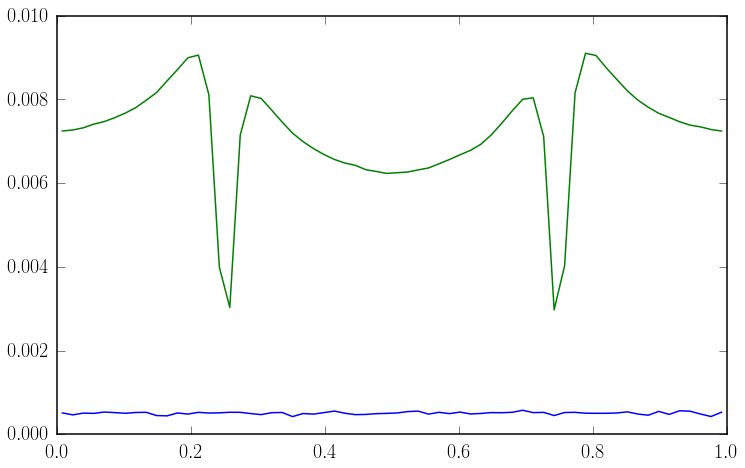

In [104]:
#pl.plot(x_center[32, 3:-3, 0], density[-1, 32, 3:-3])

background = 1e-2*(np.tanh((y - 0.25)*50) - np.tanh((y - 0.75)*50) - 1.)
initial    = (vel_drift_x[0, 3:-3, 64] ) - background
final      = (vel_drift_x[-1, 3:-3, 64]) - background

pl.plot(y_center[3:-3, 64, 0], np.abs(initial))
pl.plot(y_center[3:-3, 64, 0], np.abs(final)  )

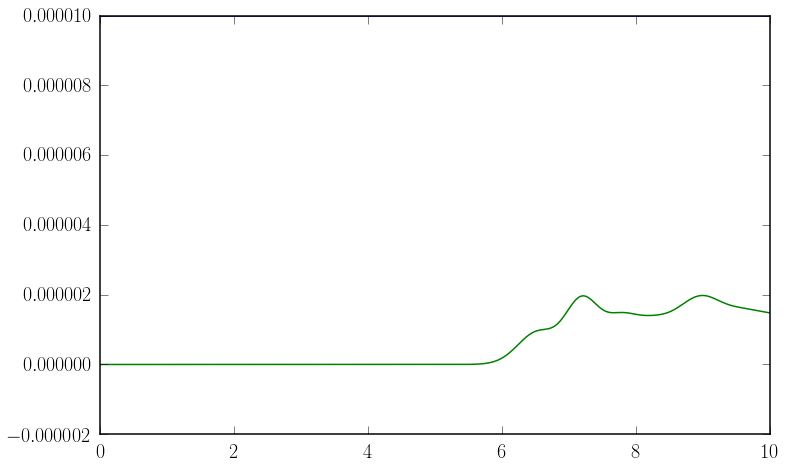

In [35]:
pl.plot(time[1:], (vel_drift_x)[1:, 3 + 32, 0 + 0])
pl.plot(time[1:], (vel_drift_x)[1:, 3 + 32, 127 + 3])

In [89]:
vel_drift_x[1:, 3 + 32, 0 + 0]

array([  1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00000000e-05,

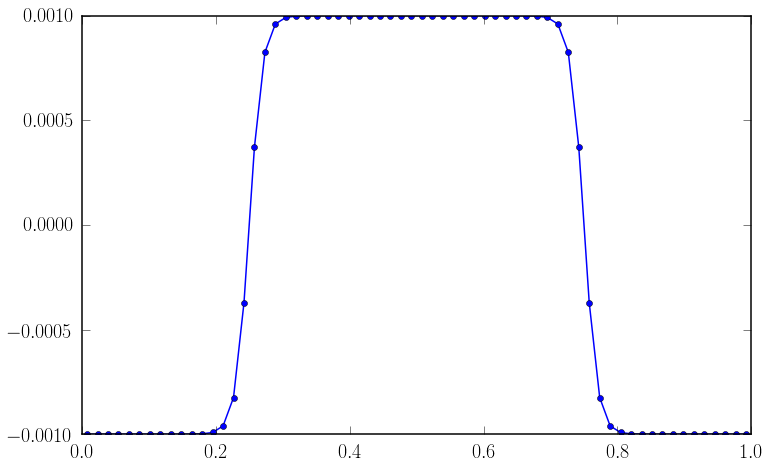

In [51]:
y = y_center[3:-3, 0, 0]

pl.plot(y, 1e-3*(np.tanh((y - 0.25)*50) - np.tanh((y - 0.75)*50) - 1.), 'o-')

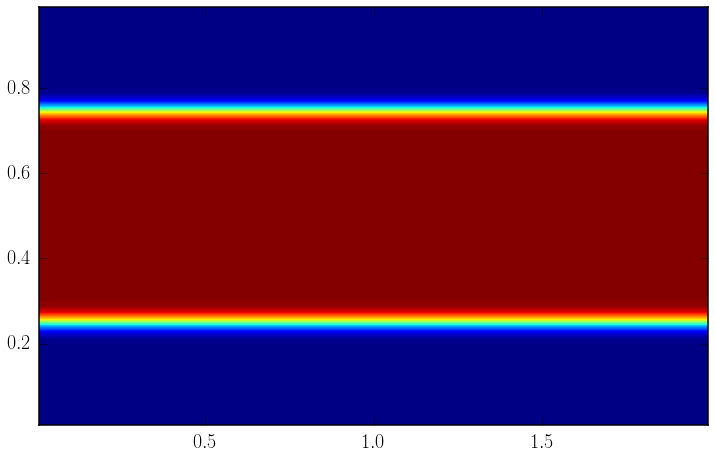

In [53]:
vel_drift_x_init = 1e-3*(np.tanh((y_center - 0.25)*50) - np.tanh((y_center - 0.75)*50) - 1.)

pl.contourf(x_center[3:-3, 3:-3, 0], y_center[3:-3, 3:-3, 0], vel_drift_x_init[3:-3, 3:-3, 0], 100)